In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


In [3]:
eq_df=pd.read_csv(r'C:\Users\mishra\Downloads\database.csv.zip')

In [4]:
eq_df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [5]:
eq_df.dtypes

Date                           object
Time                           object
Latitude                      float64
Longitude                     float64
Type                           object
Depth                         float64
Depth Error                   float64
Depth Seismic Stations        float64
Magnitude                     float64
Magnitude Type                 object
Magnitude Error               float64
Magnitude Seismic Stations    float64
Azimuthal Gap                 float64
Horizontal Distance           float64
Horizontal Error              float64
Root Mean Square              float64
ID                             object
Source                         object
Location Source                object
Magnitude Source               object
Status                         object
dtype: object

In [6]:
eq_df.isnull().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

In [7]:
missing_values_columns = [col for col in eq_df.columns
                     if eq_df[col].isnull().any()]
eq_df = eq_df.drop(missing_values_columns, axis=1)
eq_df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [8]:
lengths = eq_df["Date"].str.len()
lengths.value_counts()

10    23409
24        3
Name: Date, dtype: int64

In [9]:
wrongdates = np.where([lengths == 24])[1]
wrongdates
eq_df.loc[wrongdates]

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,ID,Source,Location Source,Magnitude Source,Status
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,5.6,USP0000A09,US,US,US,Reviewed
7512,1985-04-28T02:53:41.530Z,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,5.6,USP0002E81,US,US,HRV,Reviewed
20650,2011-03-13T02:23:34.520Z,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,5.8,USP000HWQP,US,US,GCMT,Reviewed


In [10]:
eq_df.loc[3378, "Date"] = "02/23/1975"  
eq_df.loc[7512, "Date"] = "04/28/1985"
eq_df.loc[20650, "Date"] = "03/13/2011"

In [11]:
eq_df['Date']= pd.to_datetime(eq_df['Date'])


In [12]:
eq_df['Date']=eq_df['Date'].replace([eq_df['Date']],[eq_df['Date'].dt.year])

In [13]:
eq_df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,ID,Source,Location Source,Magnitude Source,Status
0,1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [14]:
eq_df.drop('Time',axis=1,inplace=True)

In [15]:
eq_df.columns

Index(['Date', 'Latitude', 'Longitude', 'Type', 'Depth', 'Magnitude', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [16]:
eq_df['Type'].unique()

array(['Earthquake', 'Nuclear Explosion', 'Explosion', 'Rock Burst'],
      dtype=object)

In [17]:
eq_df['Type'].replace( ['Earthquake','Nuclear Explosion',
                        'Explosion','Rock Burst'], [0,1,2,3] , inplace=True)

In [18]:
eq_df['Type'].value_counts()

0    23232
1      175
2        4
3        1
Name: Type, dtype: int64

In [19]:
eq_df.head()

,Date,Latitude,Longitude,Type,Depth,Magnitude,ID,Source,Location Source,Magnitude Source,Status
0,1965,19.246,145.616,0,131.6,6.0,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1965,1.863,127.352,0,80.0,5.8,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1965,-20.579,-173.972,0,20.0,6.2,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,1965,-59.076,-23.557,0,15.0,5.8,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1965,11.938,126.427,0,15.0,5.8,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


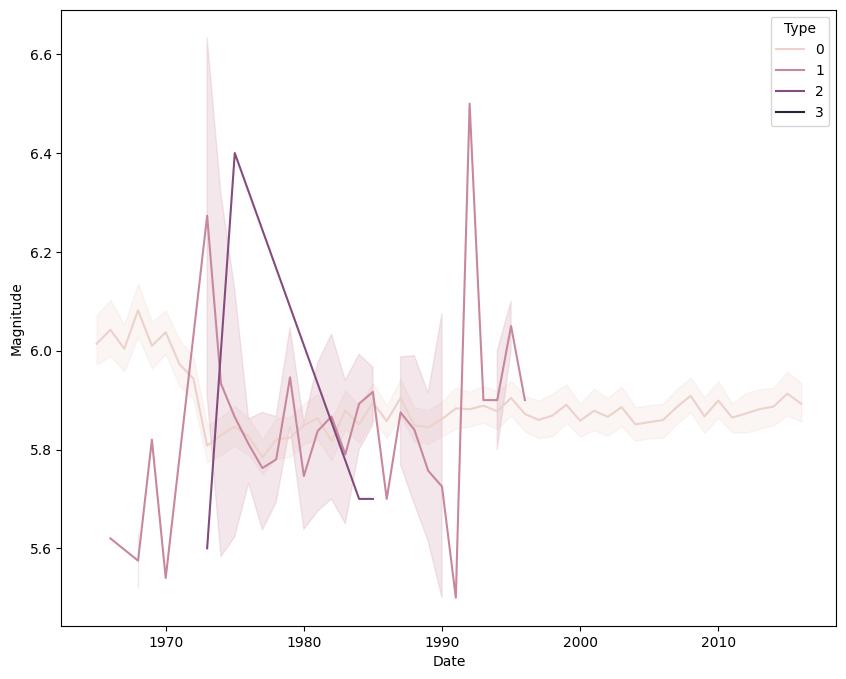

In [20]:
plt.figure(figsize=(10,8))
Time_series=sns.lineplot(x='Date',y='Magnitude',hue='Type',data=eq_df, color="#ffa600")


In [21]:
eq_df

,Date,Latitude,Longitude,Type,Depth,Magnitude,ID,Source,Location Source,Magnitude Source,Status
0,1965,19.2460,145.6160,0,131.60,6.0,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1965,1.8630,127.3520,0,80.00,5.8,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1965,-20.5790,-173.9720,0,20.00,6.2,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,1965,-59.0760,-23.5570,0,15.00,5.8,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1965,11.9380,126.4270,0,15.00,5.8,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...
23407,2016,38.3917,-118.8941,0,12.30,5.6,NN00570710,NN,NN,NN,Reviewed
23408,2016,38.3777,-118.8957,0,8.80,5.5,NN00570744,NN,NN,NN,Reviewed
23409,2016,36.9179,140.4262,0,10.00,5.9,US10007NAF,US,US,US,Reviewed
23410,2016,-9.0283,118.6639,0,79.00,6.3,US10007NL0,US,US,US,Reviewed


In [22]:
eq_df.to_csv('eq_data.csv')

In [23]:
eq_df.drop('ID',axis=1,inplace=True)


In [24]:
eq_df.drop('Source',axis=1,inplace=True)

In [25]:
eq_df.drop('Location Source',axis=1,inplace=True)

In [26]:
eq_df.drop('Magnitude Source',axis=1,inplace=True)

In [27]:
eq_df.drop('Status',axis=1,inplace=True)

In [28]:
category=pd.cut(eq_df.Magnitude,bins=[5,6,7,8,10],labels=['moderate','strong','major','great'])
eq_df.insert(5,'Class',category)

In [29]:
eq_df

,Date,Latitude,Longitude,Type,Depth,Class,Magnitude
0,1965,19.2460,145.6160,0,131.60,moderate,6.0
1,1965,1.8630,127.3520,0,80.00,moderate,5.8
2,1965,-20.5790,-173.9720,0,20.00,strong,6.2
3,1965,-59.0760,-23.5570,0,15.00,moderate,5.8
4,1965,11.9380,126.4270,0,15.00,moderate,5.8
...,...,...,...,...,...,...,...
23407,2016,38.3917,-118.8941,0,12.30,moderate,5.6
23408,2016,38.3777,-118.8957,0,8.80,moderate,5.5
23409,2016,36.9179,140.4262,0,10.00,moderate,5.9
23410,2016,-9.0283,118.6639,0,79.00,strong,6.3


In [30]:
eq_df.to_csv('earthquake_cleaned_data.csv')

In [31]:
#eq_df.isnull().sum()  ---- to find total number of  NaN in each group
#eq_df.loc[eq_df['Class'].isnull()]---- to find the located of null values


In [32]:
feature_df=eq_df[[ 'Date','Latitude', 'Longitude', 'Type','Depth', 'Magnitude']]
x=np.asarray(feature_df)
y=np.asarray(eq_df['Class'])

In [33]:
'''70:30 splitting'''
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)
                                               

In [34]:
x_train.shape

(16388, 6)

In [35]:
x_test.shape

(7024, 6)

In [36]:
y_train.shape

(16388,)

In [37]:
y_test.shape

(7024,)

In [38]:
classifier=svm.SVC(kernel='rbf',gamma='auto',C=2)

In [39]:
classifier.fit(x_train,y_train)

Y_predict=classifier.predict(x_test)

In [40]:
Y_predict

array(['moderate', 'moderate', 'moderate', ..., 'moderate', 'moderate',
       'moderate'], dtype=object)

In [41]:
print(classification_report(y_test,Y_predict))

              precision    recall  f1-score   support

       great       0.00      0.00      0.00         9
       major       0.18      0.02      0.03       181
    moderate       0.77      0.94      0.85      5318
      strong       0.35      0.13      0.19      1516

    accuracy                           0.74      7024
   macro avg       0.33      0.27      0.27      7024
weighted avg       0.67      0.74      0.68      7024



In [42]:
print((accuracy_score(y_test, Y_predict))*100)

73.84681093394077


In [43]:
from sklearn import metrics

In [44]:
confusion_matrix=metrics.confusion_matrix(y_test,Y_predict)

In [45]:
confusion_matrix

array([[   0,    0,    6,    3],
       [   1,    3,  136,   41],
       [   0,    8, 4986,  324],
       [   0,    6, 1312,  198]], dtype=int64)

In [46]:
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)

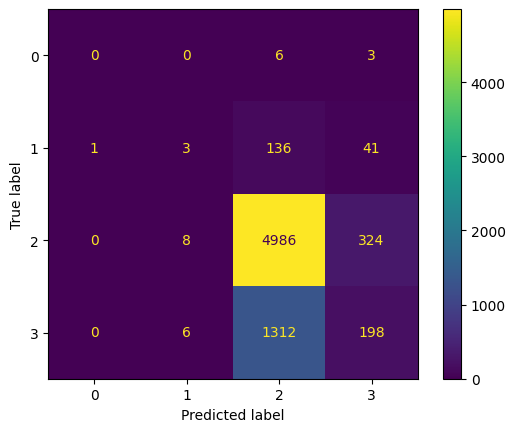

In [47]:
cm_display.plot()
plt.show()

In [49]:
model=svm.SVC(kernel='linear',gamma='auto',C=2)
model.fit(x_train,y_train)

Y_predict=model.predict(x_test)

In [50]:
Y_predict

array(['strong', 'moderate', 'moderate', ..., 'moderate', 'strong',
       'moderate'], dtype=object)

In [51]:
print(classification_report(y_test,Y_predict))

              precision    recall  f1-score   support

       great       1.00      0.44      0.62         9
       major       0.97      1.00      0.99       181
    moderate       1.00      1.00      1.00      5318
      strong       1.00      1.00      1.00      1516

    accuracy                           1.00      7024
   macro avg       0.99      0.86      0.90      7024
weighted avg       1.00      1.00      1.00      7024



In [52]:
metrics.accuracy_score(y_test,Y_predict)

0.9992881548974943

In [54]:
#poly_model=svm.SVC(kernel='poly',gamma='auto',C=2)
#poly_model.fit(x_train,y_train)

#Y_predict=poly_model.predict(x_test)

In [53]:
confusion_matrix=metrics.confusion_matrix(y_test,Y_predict)

In [54]:
confusion_matrix

array([[   4,    5,    0,    0],
       [   0,  181,    0,    0],
       [   0,    0, 5318,    0],
       [   0,    0,    0, 1516]], dtype=int64)

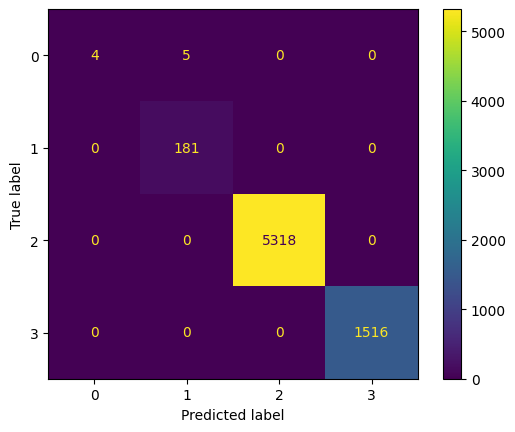

In [55]:
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
cm_display.plot()
plt.show()